In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
Data = pd.read_csv("Realty.csv")
X = Data[['f1','f2']]
y = Data['target'] 

In [3]:
Data.head()

f1        f2  target
0  0.943625 -0.679783       1
1 -0.868018 -0.253922      -1
2 -1.767471 -0.999924      -1
3  0.572276  0.394579       1
4 -1.436026 -1.307645      -1

–ú–µ—Ç–æ–¥ –æ–ø–æ—Ä–Ω—ã—Ö –≤–µ–∫—Ç–æ—Ä–æ–≤ (SVM) –≤ –ø—Ä–æ—Å—Ç–µ–π—à–µ–º –≤–∏–¥–µ –±–µ–∑ –±–∏–±–ª–∏–æ—Ç–µ–∫ –º–∞—à–∏–Ω–Ω–æ–≥–æ –æ–±—É—á–µ–Ω–∏—è. –ú—ã –∏—Å–ø–æ–ª—å–∑—É–µ–º –ª–∏–Ω–µ–π–Ω–æ–µ SVM —Å –ª–∏–Ω–µ–π–Ω—ã–º —è–¥—Ä–æ–º –∏ —Å—Ç–æ—Ö–∞—Å—Ç–∏—á–µ—Å–∫–∏–º –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–º —Å–ø—É—Å–∫–æ–º, —Ä–µ–∞–ª–∏–∑—É—è hinge loss (—Ñ—É–Ω–∫—Ü–∏—é –ø–æ—Ç–µ—Ä—å —Å –∑–∞–∑–æ—Ä–æ–º).

–§—É–Ω–∫—Ü–∏—è –¥–ª—è –≤—ã—á–∏—Å–ª–µ–Ω–∏—è —Ñ—É–Ω–∫—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å SVM (hinge-loss):

$$L = \frac12 ||w||^2 + \frac1n\cdot C\cdot \sum\limits_{i=1}^n max(0, 1 - y_i\cdot (w_0 + (w,x_i)))$$

–ú–æ–∂–Ω–æ –≤—ã—á–∏—Å–ª–∏—Ç—å –≤—Ç–æ—Ä–æ–µ —Å–ª–∞–≥–∞–µ–º–æ–µ –≤ –≤–µ–∫—Ç–æ—Ä–Ω–æ–º –≤–∏–¥–µ: $\frac1n\cdot C\cdot max(0, 1 - y \cdot (Xw + w_0))$

In [4]:
def compute_cost(X, y, w, C):
    '''
    X - –º–∞—Ç—Ä–∏—Ü–∞ –æ–±—ä–µ–∫—Ç-–ø—Ä–∏–∑–Ω–∞–∫ (c –¥–æ–±–∞–≤–ª–µ–Ω–Ω—ã–º —Å—Ç–æ–ª–±—Ü–æ–º –µ–¥–∏–Ω–∏—Ü)
    y - –≤–µ–∫—Ç–æ—Ä —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π (–∑–Ω–∞—á–µ–Ω–∏—è +1 –∏–ª–∏ -1)
    w - –≤–µ–∫—Ç–æ—Ä –≤–µ—Å–æ–≤ (–≤–∫–ª—é—á–∞—è —Å–º–µ—â–µ–Ω–∏–µ b)
    C - –ø–∞—Ä–∞–º–µ—Ç—Ä —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–∏
    '''
    n = X.shape[0]
    distances = 1 - y * np.dot(X, w)
    hinge_loss = np.maximum(0, distances)
    cost = 0.5 * np.dot(w[1:], w[1:]) + C * np.mean(hinge_loss)  # –Ω–µ —Ä–µ–≥—É–ª—è—Ä–∏–∑—É–µ–º bias (w[0])
    return cost

–§—É–Ω–∫—Ü–∏—è –¥–ª—è –≤—ã—á–∏—Å–ª–µ–Ω–∏—è –≥—Ä–∞–¥–∏–µ–Ω—Ç–∞ —Ñ—É–Ω–∫—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å –Ω–∞ –æ–¥–Ω–æ–º –æ–±—ä–µ–∫—Ç–µ –ø–æ —Ñ–æ—Ä–º—É–ª–µ:

$\nabla Q_i = w$, –µ—Å–ª–∏ $max(0, 1-y_i\cdot(w,x_i))=0$

–∏ 

$\nabla Q_i = w - Cx_iy_i$, –∏–Ω–∞—á–µ.



–î–ª—è –≤–µ—Å–∞ $w_0$ —Ñ–æ—Ä–º—É–ª—ã —Å–ª–µ–¥—É—é—â–∏–µ:

$\frac{\partial Q_i}{\partial w_0} = 0$, –µ—Å–ª–∏ $max(0, 1-y_i\cdot(w,x_i))=0$

–∏ 

$\frac{\partial Q_i}{\partial w_0} = - Cx_iy_i$, –∏–Ω–∞—á–µ.

–§—É–Ω–∫—Ü–∏—è –≤—ã—á–∏—Å–ª–µ–Ω–∏—è –≤–µ–∫—Ç–æ—Ä–∞ - –≥—Ä–∞–¥–∏–µ–Ω—Ç–∞.

In [5]:
def calculate_cost_gradient(x_input, y_input, w, C):
    '''
    x_input - –≤–µ–∫—Ç–æ—Ä –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ (–≤–∫–ª—é—á–∞—è 1 –Ω–∞ –ø–µ—Ä–≤–æ–π –ø–æ–∑–∏—Ü–∏–∏ ‚Äî —Å–º–µ—â–µ–Ω–∏–µ)
    y_input - —Ü–µ–ª–µ–≤–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è (+1 –∏–ª–∏ -1)
    w - –≤–µ—Å–∞ –º–æ–¥–µ–ª–∏
    C - –ø–∞—Ä–∞–º–µ—Ç—Ä —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–∏
    '''
    if y_input * np.dot(x_input, w) < 1:
        dw = np.zeros_like(w)
        dw[1:] = w[1:] - C * y_input * x_input[1:]
        dw[0] = -C * y_input * x_input[0]  # —Å–º–µ—â–µ–Ω–∏–µ –æ–±—Ä–∞–±–∞—Ç—ã–≤–∞–µ–º –æ—Ç–¥–µ–ª—å–Ω–æ
    else:
        dw = np.zeros_like(w)
        dw[1:] = w[1:]  # —Ç–æ–ª—å–∫–æ —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏—è
    return dw



–°—Ç–æ—Ö–∞—Å—Ç–∏—á–µ—Å–∫–∏–π –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π —Å–ø—É—Å–∫

In [6]:
def stochastic_gradient_descent(X, y, params, learning_rate, iterations, C):
    n = X.shape[0]
    cost_track = np.zeros((iterations, 1))
    
    for i in range(iterations):
        idx = random.randint(0, n - 1)
        x_i = X[idx]
        y_i = y[idx]
        grad = calculate_cost_gradient(x_i, y_i, params, C)
        params = params - learning_rate * grad
        cost_track[i] = compute_cost(X, y, params, C)
    
    return cost_track, params

–§—É–Ω–∫—Ü–∏—è –ø–æ–ª—É—á–µ–Ω–∏—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è

In [7]:
def predict(X, params):
    '''
    X ‚Äî –º–∞—Ç—Ä–∏—Ü–∞ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –±–µ–∑ –µ–¥–∏–Ω–∏—á–Ω–æ–≥–æ —Å—Ç–æ–ª–±—Ü–∞
    params ‚Äî –≤–µ–∫—Ç–æ—Ä –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ (bias + weights)
    '''
    X_augmented = np.hstack([np.ones((X.shape[0], 1)), X])  # –¥–æ–±–∞–≤–∏–º –µ–¥–∏–Ω–∏—á–∫—É
    return np.sign(np.dot(X_augmented, params))

–ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö

In [8]:
# –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º y –≤ —Ñ–æ—Ä–º–∞—Ç {-1, +1}
y = y.values
y = np.where(y == -1, -1, 1)

# –î–æ–±–∞–≤–∏–º –µ–¥–∏–Ω–∏—á–Ω—ã–π —Å—Ç–æ–ª–±–µ—Ü –∫ X
X_aug = np.hstack([np.ones((X.shape[0], 1)), X.values])

# –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è –≤–µ—Å–æ–≤
params = np.random.randn(X_aug.shape[1])

# –ü–∞—Ä–∞–º–µ—Ç—Ä—ã –æ–±—É—á–µ–Ω–∏—è
learning_rate = 0.01
iterations = 3000
C = 1.0

# –û–±—É—á–µ–Ω–∏–µ
cost_track, trained_params = stochastic_gradient_descent(X_aug, y, params, learning_rate, iterations, C)

# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ
y_pred = predict(X.values, trained_params)

–í—ã–≤–µ–¥–µ–º –∑–Ω–∞—á–µ–Ω–∏—è –≤–µ—Å–æ–≤

In [9]:
print("b =", trained_params[0])
print("w1 =", trained_params[1])
print("w2 =", trained_params[2])
print("w1/w2 =", trained_params[1] / trained_params[2])

b = 0.09337545572327816
w1 = 0.7112237080401854
w2 = 0.05548502402628389
w1/w2 = 12.818300442715328


–ì—Ä–∞—Ñ–∏–∫ —Ñ—É–Ω–∫—Ü–∏–∏ —Å—Ç–æ–∏–º–æ—Å—Ç–∏ (loss)

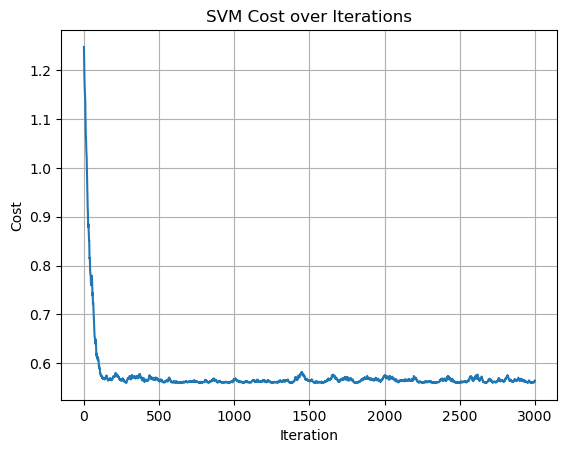

In [10]:
plt.plot(cost_track)
plt.title("SVM Cost over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.grid(True)
plt.show()

–í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –¥–∞–Ω–Ω—ã—Ö –∏ —Ä–∞–∑–¥–µ–ª—è—é—â–µ–π –≥–∏–ø–µ—Ä–ø–ª–æ—Å–∫–æ—Å—Ç–∏

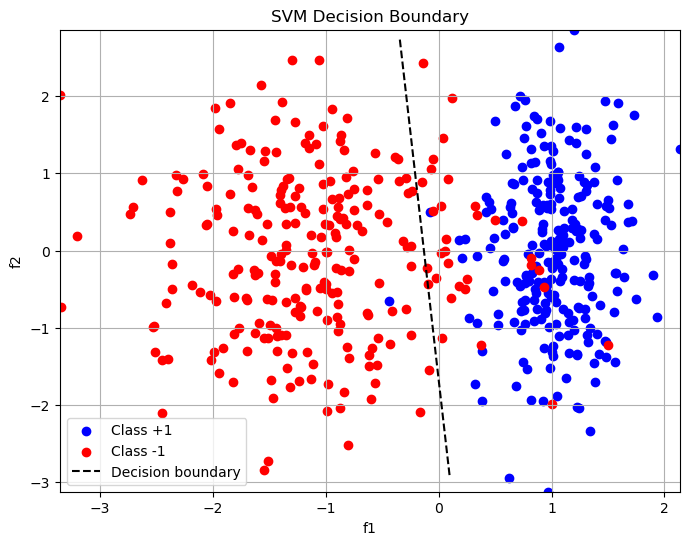

In [11]:
# –ü–æ—Å—Ç—Ä–æ–∏–º –≥—Ä–∞–Ω–∏—Ü—É —Ä–µ—à–µ–Ω–∏—è
def plot_decision_boundary(X, y, params):
    plt.figure(figsize=(8, 6))
    
    # –†–∞–∑–¥–µ–ª–∏–º –ø–æ –∫–ª–∞—Å—Å–∞–º
    pos = y == 1
    neg = y == -1
    plt.scatter(X[pos, 0], X[pos, 1], color='blue', label='Class +1')
    plt.scatter(X[neg, 0], X[neg, 1], color='red', label='Class -1')

    # –ü–æ–ª—É—á–∏–º –≤–µ—Å–∞ –∏ bias
    b = params[0]
    w1, w2 = params[1], params[2]
    
   # –î–∏–∞–ø–∞–∑–æ–Ω –ø–æ X
    x_vals = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 300)
    
    # –í—ã—á–∏—Å–ª–µ–Ω–∏–µ Y, —Å –∑–∞—â–∏—Ç–æ–π –æ—Ç –¥–µ–ª–µ–Ω–∏—è –Ω–∞ 0
    if abs(w2) < 1e-6:
        # –ü–æ—á—Ç–∏ –≤–µ—Ä—Ç–∏–∫–∞–ª—å–Ω–∞—è –≥—Ä–∞–Ω–∏—Ü–∞
        x0 = -b / w1
        plt.axvline(x=x0, linestyle='--', color='k', label='Decision boundary')
    else:
        y_vals = -(w1 * x_vals + b) / w2

        # –û–≥—Ä–∞–Ω–∏—á–∏–º –∑–Ω–∞—á–µ–Ω–∏—è –ø–æ Y
        min_y, max_y = np.min(X[:, 1]), np.max(X[:, 1])
        y_vals_clipped = np.clip(y_vals, min_y, max_y)

        # –£–±–∏—Ä–∞–µ–º —É—á–∞—Å—Ç–∫–∏, –≥–¥–µ –æ–±—Ä–µ–∑–∫–∞ –∏–∑–º–µ–Ω–∏–ª–∞ –∑–Ω–∞—á–µ–Ω–∏–µ
        valid_mask = (y_vals == y_vals_clipped)
        plt.plot(x_vals[valid_mask], y_vals_clipped[valid_mask], 'k--', label='Decision boundary')

    # –ì—Ä–∞–Ω–∏—Ü—ã –æ—Å–µ–π
    plt.xlim(np.min(X[:, 0]), np.max(X[:, 0]))
    plt.ylim(np.min(X[:, 1]), np.max(X[:, 1]))    

    plt.xlabel('f1')
    plt.ylabel('f2')
    plt.title('SVM Decision Boundary')
    plt.legend()
    plt.grid(True)
    plt.show()

# –í—ã–∑–æ–≤ –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏
plot_decision_boundary(X.values, y, trained_params)

–î–æ–±–∞–≤–∏–º –∫ –≥—Ä–∞—Ñ–∏–∫—É **–¥–≤–µ –ª–∏–Ω–∏–∏ –ø–æ–¥–¥–µ—Ä–∂–∫–∏ (margins)**, —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–µ —É—Ä–∞–≤–Ω–µ–Ω–∏—è–º:

    w1x+w2y+b=+1w1‚Äãx+w2‚Äãy+b=+1

    w1x+w2y+b=‚àí1w1‚Äãx+w2‚Äãy+b=‚àí1

–≠—Ç–∏ –ª–∏–Ω–∏–∏ –ø—Ä–æ—Ö–æ–¥—è—Ç —á–µ—Ä–µ–∑ **–æ–ø–æ—Ä–Ω—ã–µ –≤–µ–∫—Ç–æ—Ä—ã**, –∏ –æ–ø—Ä–µ–¥–µ–ª—è—é—Ç —à–∏—Ä–∏–Ω—É –∑–∞–∑–æ—Ä–∞ (margin) –º–µ–∂–¥—É –∫–ª–∞—Å—Å–∞–º–∏.

In [12]:
def plot_decision_boundary_with_margin(X, y, params):
    plt.figure(figsize=(8, 6))

    # –ö–ª–∞—Å—Å—ã
    pos = y == 1
    neg = y == -1
    plt.scatter(X[pos, 0], X[pos, 1], color='blue', label='Class +1')
    plt.scatter(X[neg, 0], X[neg, 1], color='red', label='Class -1')

    # –ü–∞—Ä–∞–º–µ—Ç—Ä—ã
    b = params[0]
    w1, w2 = params[1], params[2]

    # –î–∏–∞–ø–∞–∑–æ–Ω—ã
    x_min, x_max = np.min(X[:, 0]), np.max(X[:, 0])
    y_min, y_max = np.min(X[:, 1]), np.max(X[:, 1])
    x_vals = np.linspace(x_min, x_max, 300)

    if abs(w2) < 1e-6:
        # –í–µ—Ä—Ç–∏–∫–∞–ª—å–Ω–∞—è –≥—Ä–∞–Ω–∏—Ü–∞
        x0 = -b / w1
        plt.axvline(x=x0, linestyle='--', color='k', label='Decision boundary')
        plt.axvline(x=x0 - 1 / w1, linestyle='-.', color='g', label='Margin -1')
        plt.axvline(x=x0 + 1 / w1, linestyle='-.', color='g', label='Margin +1')
    else:
        # –§—É–Ω–∫—Ü–∏—è –ª–∏–Ω–∏–∏ —Å –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–∏–µ–º –ø–æ Y
        def safe_line(offset):
            y_vals = -(w1 * x_vals + b - offset) / w2
            y_vals_clipped = np.clip(y_vals, y_min, y_max)
            valid_mask = (y_vals == y_vals_clipped)
            return x_vals[valid_mask], y_vals_clipped[valid_mask]

        x0, y0 = safe_line(0)
        x1, y1 = safe_line(1)
        x_1, y_1 = safe_line(-1)

        plt.plot(x0, y0, 'k--', label='Decision boundary')
        plt.plot(x1, y1, 'g-.', label='Margin +1')
        plt.plot(x_1, y_1, 'g-.', label='Margin -1')

    # –û–≥—Ä–∞–Ω–∏—á–µ–Ω–∏—è –æ—Å–µ–π
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.xlabel('f1')
    plt.ylabel('f2')
    plt.title('SVM Decision Boundary with Margins')
    plt.legend()
    plt.grid(True)
    plt.show()


**–í–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ–º**

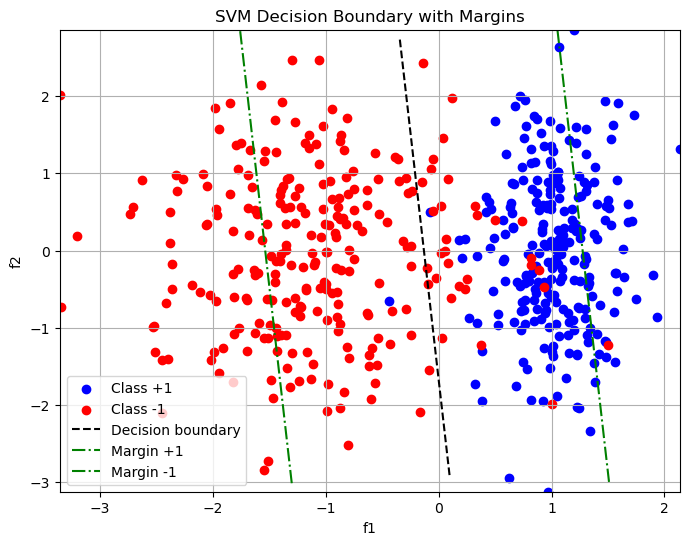

In [13]:
# –í—ã–∑–æ–≤
plot_decision_boundary_with_margin(X.values, y, trained_params)

–ü—Ä–æ–¥–æ–ª–∂–∏–º —Å –≤—ã–¥–µ–ª–µ–Ω–∏–µ–º **–æ–ø–æ—Ä–Ω—ã—Ö –≤–µ–∫—Ç–æ—Ä–æ–≤ –∏ –æ—à–∏–±–æ—á–Ω—ã—Ö –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–π**. –≠—Ç–æ –ø–æ–º–æ–∂–µ—Ç —É–≤–∏–¥–µ—Ç—å, –∫–∞–∫–∏–µ —Ç–æ—á–∫–∏ "–¥–µ—Ä–∂–∞—Ç" –≥—Ä–∞–Ω–∏—Ü—É, –∏ –≥–¥–µ –∞–ª–≥–æ—Ä–∏—Ç–º –æ—à–∏–±–∞–µ—Ç—Å—è.

In [ ]:
def plot_support_vectors_and_misclassified(X, y, params, threshold=1e-2):
    plt.figure(figsize=(8, 6))

    b = params[0]
    w = params[1:]
    w1, w2 = w[0], w[1]

    # –î–æ–±–∞–≤–∏–º —Å–º–µ—â–µ–Ω–∏–µ –∫ X
    X_aug = np.hstack([np.ones((X.shape[0], 1)), X])
    decision_values = X_aug @ params
    margins = y * decision_values

    # –ú–µ—Ç–∫–∏
    misclassified = margins < 0
    support_vector_margin = np.abs(margins - 1) < threshold

    # –î–∏–∞–ø–∞–∑–æ–Ω—ã
    x_min, x_max = np.min(X[:, 0]), np.max(X[:, 0])
    y_min, y_max = np.min(X[:, 1]), np.max(X[:, 1])
    x_vals = np.linspace(x_min, x_max, 300)

    # –¢–æ—á–∫–∏ –∫–ª–∞—Å—Å–æ–≤
    plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Class +1')
    plt.scatter(X[y == -1, 0], X[y == -1, 1], color='red', label='Class -1')

    # –û–ø–æ—Ä–Ω—ã–µ –≤–µ–∫—Ç–æ—Ä—ã
    plt.scatter(X[support_vector_margin, 0], X[support_vector_margin, 1],
                facecolors='none', edgecolors='black', linewidths=2, s=100, label='Support Vectors')

    # –û—à–∏–±–∫–∏
    plt.scatter(X[misclassified, 0], X[misclassified, 1],
                color='yellow', edgecolors='black', marker='x', s=100, label='Misclassified')

    # –û—Ç—Ä–∏—Å–æ–≤–∫–∞ –≥—Ä–∞–Ω–∏—Ü
    if abs(w2) < 1e-6:
        x0 = -b / w1
        plt.axvline(x=x0, linestyle='--', color='k', label='Decision boundary')
        plt.axvline(x=x0 - 1 / w1, linestyle='-.', color='g', label='Margin -1')
        plt.axvline(x=x0 + 1 / w1, linestyle='-.', color='g', label='Margin +1')
    else:
        def safe_line(offset):
            y_vals = -(w1 * x_vals + b - offset) / w2
            y_vals_clipped = np.clip(y_vals, y_min, y_max)
            valid_mask = (y_vals == y_vals_clipped)
            return x_vals[valid_mask], y_vals_clipped[valid_mask]

        x0, y0 = safe_line(0)
        x1, y1 = safe_line(1)
        x_1, y_1 = safe_line(-1)

        plt.plot(x0, y0, 'k--', label='Decision boundary')
        plt.plot(x1, y1, 'g-.', label='Margin +1')
        plt.plot(x_1, y_1, 'g-.', label='Margin -1')

    # –û–≥—Ä–∞–Ω–∏—á–µ–Ω–∏—è –∏ –æ—Ñ–æ—Ä–º–ª–µ–Ω–∏–µ
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel("f1")
    plt.ylabel("f2")
    plt.title("SVM with Support Vectors and Misclassified Points")
    plt.legend()
    plt.grid(True)
    plt.show()


–ò—Ç–æ–≥:

    üîµ –°–∏–Ω–∏–µ –∏ üî¥ –∫—Ä–∞—Å–Ω—ã–µ ‚Äî –æ–±—ã—á–Ω—ã–µ —Ç–æ—á–∫–∏ –∫–ª–∞—Å—Å–æ–≤.

    ‚ö´Ô∏è –ö–æ–ª—å—Ü–∞ ‚Äî –æ–ø–æ—Ä–Ω—ã–µ –≤–µ–∫—Ç–æ—Ä—ã.

    ‚ùå –ñ—ë–ª—Ç—ã–µ –∫—Ä–µ—Å—Ç–∏–∫–∏ ‚Äî –æ—à–∏–±–æ—á–Ω—ã–µ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏.

    -- ‚Äî –≥–∏–ø–µ—Ä–ø–ª–æ—Å–∫–æ—Å—Ç—å.

    -. ‚Äî margin.

In [ ]:
# –í—ã–∑–æ–≤
plot_support_vectors_and_misclassified(X.values, y, trained_params)

–í–µ—Ä—Å–∏—è stochastic_gradient_descent —Å —Ç—Ä–µ–∫–∏–Ω–≥–æ–º:

In [ ]:
def stochastic_gradient_descent_track(X, y, params, learning_rate, iterations, C):
    n = X.shape[0]
    params_history = [params.copy()]
    cost_track = np.zeros((iterations, 1))

    for i in range(iterations):
        idx = random.randint(0, n - 1)
        x_i = X[idx]
        y_i = y[idx]
        grad = calculate_cost_gradient(x_i, y_i, params, C)
        params = params - learning_rate * grad
        params_history.append(params.copy())
        cost_track[i] = compute_cost(X, y, params, C)

    return cost_track, np.array(params_history)

In [ ]:
from matplotlib import animation

def animate_svm(X, y, params_history):
    fig, ax = plt.subplots(figsize=(8, 6))

    def init():
        ax.clear()
        ax.set_xlim(np.min(X[:, 0]) - 1, np.max(X[:, 0]) + 1)
        ax.set_ylim(np.min(X[:, 1]) - 1, np.max(X[:, 1]) + 1)
        ax.set_xlabel('f1')
        ax.set_ylabel('f2')
        ax.set_title('SVM Training Animation')
        return ax,

    def animate(i):
        ax.clear()
        b = params_history[i][0]
        w1, w2 = params_history[i][1], params_history[i][2]
        x_vals = np.linspace(np.min(X[:, 0]) - 1, np.max(X[:, 0]) + 1, 200)

        def line(offset):
            return -(w1 * x_vals + b - offset) / w2

        # —Ç–æ—á–∫–∏
        ax.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Class +1')
        ax.scatter(X[y == -1, 0], X[y == -1, 1], color='red', label='Class -1')

        # –≥—Ä–∞–Ω–∏—Ü—ã
        ax.plot(x_vals, line(0), 'k--', label='Decision boundary')
        ax.plot(x_vals, line(1), 'g-.', label='Margin +1')
        ax.plot(x_vals, line(-1), 'g-.', label='Margin -1')

        ax.set_xlim(np.min(X[:, 0]) - 1, np.max(X[:, 0]) + 1)
        ax.set_ylim(np.min(X[:, 1]) - 1, np.max(X[:, 1]) + 1)
        ax.legend()
        ax.grid(True)
        ax.set_title(f"SVM Training Iteration {i}")
        return ax,

    anim = animation.FuncAnimation(fig, animate, init_func=init,
                                   frames=len(params_history), interval=50, blit=False)
    plt.close()
    return anim


### –ê–Ω–∏–º–∞—Ü–∏—è –æ–±—É—á–µ–Ω–∏—è:

In [ ]:
# –ó–∞–ø—É—Å–∫ –æ–±—É—á–µ–Ω–∏—è —Å —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ–º –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤
cost_track, params_history = stochastic_gradient_descent_track(X_aug, y, params, learning_rate, iterations=100, C=1.0)

# –ì–µ–Ω–µ—Ä–∞—Ü–∏—è –∞–Ω–∏–º–∞—Ü–∏–∏
anim = animate_svm(X.values, y, params_history)

# –ü—Ä–æ—Å–º–æ—Ç—Ä –≤ Jupyter
from IPython.display import HTML
HTML(anim.to_jshtml())